# Problem Set 2, due April 27th at 3:30 pm

**Please Note:** This assignment will likely take you a _long_ time, especially if you are new to Python. Start early!

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|---------|---------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 'pobre'|
|progresa |treatment = 'basal'|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	  |gender of head of household (male=1)|
|hohage   |age of head of household|
|age      |years old|
|folnum	  |individual id|
|village  |	village id|
|sc97	  |schooling in 1997|

In [14]:
import sys; print(sys.version)
%matplotlib inline

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]


---
##Part 1: Descriptive analysis

### 1.1	Summary Statistics

a) Present number of missing observations for every single variable


In [15]:
#import all packages 
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
from patsy import dmatrices
import matplotlib.pyplot as plt
import statsmodels.api as sm
# reading the input file
p_df = pd.read_csv("progresa_sample.csv")
#The below step gives the number of missing observations (i.e. Nan) for each variable
p_df.isnull().sum()

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

b) Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [16]:
#Take the selected columns and find their mean and standard deviation
p_b_df = p_df[['sex','indig','dist_sec','sc','grc','fam_n','min_dist','dist_cap','poor','progresa','hohedu',
                             'hohwag','welfare_index','hohsex','hohage','age','grc97','sc97']].describe().T
p_b_df = p_b_df[['mean','std']]
p_b_df.sort_index(axis=0)

,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male  |?     |?     |?     |?     |


In [17]:
#First filter the dataset for the year 97 and poor = 'pobre' 
#Then divide the dataset in Treatment and control using progresa = 'Basal'
p_new_df = p_df[(p_df['year']==97) & (p_df['poor']=='pobre')]
p_t_df = p_new_df[(p_new_df['progresa']=='basal')]
p_c_df = p_new_df[(p_new_df['progresa']!='basal')]

#Find the t statistic and p-value for each variable
age_t,age_p = stats.ttest_ind(p_t_df['age'].dropna(),p_c_df['age'].dropna())
dist_cap_t,dist_cap_p = stats.ttest_ind(p_t_df['dist_cap'].dropna(),p_c_df['dist_cap'].dropna())
dist_sec_t,dist_sec_p = stats.ttest_ind(p_t_df['dist_sec'].dropna(),p_c_df['dist_sec'].dropna())
fam_n_t,fam_n_p = stats.ttest_ind(p_t_df['fam_n'].dropna(),p_c_df['fam_n'].dropna())
grc_t,grc_p = stats.ttest_ind(p_t_df['grc'].dropna(),p_c_df['grc'].dropna())
grc97_t,grc97_p = stats.ttest_ind(p_t_df['grc97'].dropna(),p_c_df['grc97'].dropna())
hohage_t,hohage_p = stats.ttest_ind(p_t_df['hohage'].dropna(),p_c_df['hohage'].dropna())
hohedu_t,hohedu_p = stats.ttest_ind(p_t_df['hohedu'].dropna(),p_c_df['hohedu'].dropna())
hohwag_t,hohwag_p = stats.ttest_ind(p_t_df['hohwag'].dropna(),p_c_df['hohwag'].dropna())
indig_t,indig_p = stats.ttest_ind(p_t_df['indig'].dropna(),p_c_df['indig'].dropna())
min_dist_t, min_dist_p = stats.ttest_ind(p_t_df['min_dist'].dropna(),p_c_df['min_dist'].dropna())
windex_t,windex_p = stats.ttest_ind(p_t_df['welfare_index'].dropna(),p_c_df['welfare_index'].dropna())
sc_t,sc_p = stats.ttest_ind(p_t_df['sc'].dropna(),p_c_df['sc'].dropna())
sc97_t,sc97_p = stats.ttest_ind(p_t_df['sc97'].dropna(),p_c_df['sc97'].dropna())
sex_t,sex_p = stats.ttest_ind(p_t_df['sex'].dropna(),p_c_df['sex'].dropna())
folnum_t,folnum_p = stats.ttest_ind(p_t_df['folnum'].dropna(),p_c_df['folnum'].dropna())

p_t_mean_df=p_t_df[['age','dist_cap','dist_sec','fam_n','folnum','grc','grc97','hohage','hohedu','hohwag','indig','min_dist','welfare_index','sc','sc97','sex']].mean()
p_c_mean_df=p_c_df[['age','dist_cap','dist_sec','fam_n','folnum','grc','grc97','hohage','hohedu','hohwag', 'indig','min_dist','welfare_index','sc','sc97','sex']].mean()
p_value_ser = pd.Series([age_p, dist_cap_p, dist_sec_p, fam_n_p, folnum_p, grc_p, grc97_p, hohage_p, hohedu_p, hohwag_p, indig_p, min_dist_p,windex_p,sc_p,sc97_p,sex_p])
t_value_ser = pd.Series([age_t,dist_cap_t,dist_sec_t,fam_n_t,folnum_t,grc_t,grc97_t,hohage_t,hohedu_t,hohwag_t,indig_t,
                         min_dist_t,windex_t,sc_t,sc97_t,sex_t])

#Converting into table format for display
one_two_df = pd.DataFrame(columns = ['Variable name','Average value (Treatment villages)','Average value (Control villages)',
                                     'Difference (Treat - Control)','p-value'])
one_two_df['Variable name'] = p_t_mean_df.index
one_two_df['Average value (Treatment villages)'] = p_t_mean_df.values
one_two_df['Average value (Control villages)'] = p_c_mean_df.values
one_two_df['Difference (Treat - Control)'] = t_value_ser
one_two_df['p-value']=p_value_ser 
one_two_df

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.716991,10.742023,-0.708630,4.785594e-01
1,dist_cap,150.829074,153.769730,-3.339081,8.415005e-04
2,dist_sec,2.453122,2.507662,-2.100433,3.569843e-02
3,fam_n,7.281327,7.302469,-0.794167,4.271039e-01
4,folnum,19321.168233,19272.844316,0.381131,7.031082e-01
5,grc,3.531599,3.543050,-0.400196,6.890151e-01
6,grc97,3.531599,3.543050,-0.400196,6.890151e-01
7,hohage,43.648828,44.276918,-4.775962,1.796243e-06
8,hohedu,2.663139,2.590348,2.541229,1.105093e-02
9,hohwag,544.339544,573.163558,-3.594588,3.253835e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

Assuming confidence level of 95%, p-value is 0.05.

A: It is observed from the data that there is statistical significance for few variables such as dist_cap, dist_sec, hohage, hohedu, hohwag, min_dist and welfare_index. However, it is not significant for the other variables

B: The differences at the baseline matter as it indicates that poor randomization technique was used to separate the control and treatment groups. This eventually leads to bias and the result will be a poor indicator of the effectiveness of Progresa program.

C: It implies that to get appropriate results on our test, it is important to randomize the samples coorectly into treatment and control groups.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

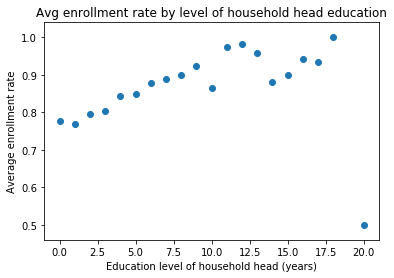

In [18]:
#Filter by 97
p_gr_df = p_df[(p_df['year']==97)]
p_gr_df = p_gr_df[['hohedu','sc']].groupby('hohedu').mean()
plt.scatter(p_gr_df.index.values,p_gr_df['sc'])
plt.xlabel('Education level of household head (years)')
plt.ylabel('Average enrollment rate')
plt.title('Avg enrollment rate by level of household head education')
plt.show()

As per the scatterplot, it can be seen that as the education level of the household head increases, there is increase in the average enrollment rate implying that if the household head is educated, they allow their children to get enrolled at school as they see the benefits of getting an education into the life of their child/children.
However, there is a sharp drop in average enrollment rate when the  education level of household head increases from 9 to 10 years, 13 to 14 years and 18 to 20 years.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
* Does there appear to be a difference? Is this difference statistically significant?
* Which D estimator in Schultz (2004) does this approach correspond to?

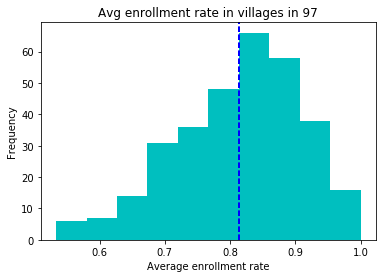

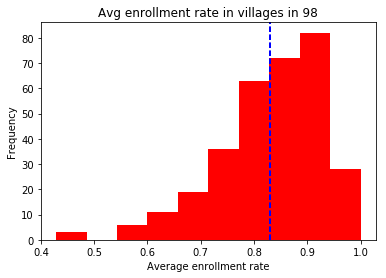

The t test statistic value is: -2.01571348652
The p-value is: 0.0442487003657


In [19]:
#Filter data by year, progresa and poor/non-poor 
p97_df = p_df[(p_df['progresa']=='basal') & (p_df['poor']=='pobre') & (p_df['year']==97)]
p98_df = p_df[(p_df['progresa']=='basal') & (p_df['poor']=='pobre') & (p_df['year']==98)]
p97_df = p97_df.groupby('village').mean()
p98_df = p98_df.groupby('village').mean()

#Plot for year 97
plt.hist(p97_df['sc'],color='c')
plt.xlabel('Average enrollment rate')
plt.ylabel('Frequency')
plt.title('Avg enrollment rate in villages in 97')
plt.axvline(p97_df['sc'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.show()

# Plot for year 98
plt.hist(p98_df['sc'],color='r')
plt.xlabel('Average enrollment rate')
plt.ylabel('Frequency')
plt.title('Avg enrollment rate in villages in 98')
plt.axvline(p98_df['sc'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.show()

#For statistical significance
t,p = stats.ttest_ind(p97_df['sc'].dropna(),p98_df['sc'].dropna())
print('The t test statistic value is:',t)
print('The p-value is:',p)


A: The difference between the village enrollment rates among poor households in 97 and 98 is highly significant as the p-value is 0.04 (less than 0.05) and Progresa has had effect on the increase in the enrollment rates.

B: It corresponds to the Single Difference Estimator D1 from Schultz

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

Start out by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment).
* calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages.
* Which difference estimator in Schultz (2004) does this approach correspond to?
* Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [20]:
#Filter on year 98 
p_98_df = p_df[(p_df['year']==98)]
p_98_p_t_df = p_98_df[(p_98_df['progresa']=='basal') & (p_98_df['poor']=='pobre')]
p_98_p_c_df = p_98_df[(p_98_df['progresa']!='basal') & (p_98_df['poor']=='pobre')]
p_98_p_t_avg = p_98_p_t_df['sc'].dropna().mean()
p_98_p_c_avg = p_98_p_c_df['sc'].dropna().mean()
print("Average enrollment rate in poor household in treatment village in 1998:", p_98_p_t_avg)
print("Average enrollment rate in pool household in control village in 1998:", p_98_p_c_avg)
print("Diff in average enrollment rate:", abs(p_98_p_t_avg - p_98_p_c_avg) )
#Calculate the t test
t98,p98 = stats.ttest_ind(p_98_p_t_df['sc'].dropna(),p_98_p_c_df['sc'].dropna())
print ("T statistic value:",t98)
print("P value:",p98)

Average enrollment rate in poor household in treatment village in 1998: 0.8464791213954308
Average enrollment rate in pool household in control village in 1998: 0.807636956730308
Diff in average enrollment rate: 0.0388421646651228
T statistic value: 8.35872056742
P value: 6.63634444752e-17


It corresponds to the Single Difference - Post Program Period Average Estimator
The t-test gives a p-value of 6.63 * 10^-17 which is highly significant. From this it can be concluded that there is high impact of the Progresa program in the year 1998 and led to a higher enrollment rate.


### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [21]:
#Filter by 98
p_98_poor = p_98_df[p_98_df['poor']=='pobre']
p_98_poor['progresa'] = p_98_poor['progresa'].replace(['basal'],'1')
p_98_poor.dropna(inplace=True)
y, x = dmatrices('sc ~ progresa',p_98_poor, return_type="dataframe")
model=sm.OLS(y,x)
res=model.fit()
print(res.summary())

C:\Users\parekhdh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\parekhdh\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Tue, 02 May 2017   Prob (F-statistic):           5.66e-16
Time:                        00:26:10   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.8109      0.004    217.190

A. On the basis of this model, Progresa increased the likelihood of enrollment rate of a child in a school increased by 0.0383

B. The results obtained via regression and t-test are in sync and the p-value says that it is highly significant.

C. Based on the regression model, we can reject the null hypothesis and accept the alternate hypothesis that the treatment effect is non-zero.

D. The counterfactual assumption is that in the absence of the Progresa grant, the average enrollment rate in the treatment and control groups remain the same.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [22]:
#Adding a set of control variables for multiple regression
p_98_poor['sex'] = p_98_poor['sex'].astype(int) 
y1,x1 = dmatrices('sc ~ progresa + age + dist_sec + sex + hohedu + indig', p_98_poor,return_type= 'dataframe')
model1 = sm.OLS(y1,x1)
res1 = model1.fit()
print(res1.summary())

C:\Users\parekhdh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     1557.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        00:26:19   Log-Likelihood:                -7208.4
No. Observations:               26155   AIC:                         1.443e+04
Df Residuals:                   26148   BIC:                         1.449e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.5206      0.010    157.308

A. Addition of controls to the regression model reduces the coefficient for Progressa by a small margin. It goes from 0.038 to 0.035.

B. Addition of controls to the regression model, reduces the standard error by a very small margin. It reduces from 0.05 to 0.04.

C. The enrollment rate for the multiple regression model is slightly lower as compared to the single regression model which is mainly caused by the addition of other predictors. Since the effect is very low, it can be deduced that Progresa is the dominant variable in determining the enrollment rate.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [23]:
#The below dataframe is for poor households in treated villages in 1997
p_97_treat_p = p_df[(p_df['year']==97) &(p_df['progresa']=='basal') & (p_df['poor']=='pobre')] 
#The below dataframe is for poor households in control villages in 1997
p_97_control_p = p_df[(p_df['year']==97) &(p_df['progresa']!='basal') & (p_df['poor']=='pobre')]
#The below dataframe is for poor households in treated villages in 1998
p_98_treat_p = p_df[(p_df['year']==98) &(p_df['progresa']=='basal') & (p_df['poor']=='pobre')]
#The below dataframe is for poor households in control villages in 1998
p_98_control_p = p_df[(p_df['year']==98) &(p_df['progresa']!='basal') & (p_df['poor']=='pobre')]

p_97_treat_p_mean = p_97_treat_p['sc'].mean()
p_97_control_p_mean = p_97_control_p['sc'].mean()
p_98_treat_p_mean = p_98_treat_p['sc'].mean()
p_98_control_p_mean = p_98_control_p['sc'].mean()
print('Average enrollment rates for poor households in treatment group in 97:',p_97_treat_p_mean)
print('Average enrollment rates for poor households in control group in 97:',p_97_control_p_mean)
print('Average enrollment rates for poor households in treatment group in 98:',p_98_treat_p_mean)
print('Average enrollment rates for poor households in control group in 98:',p_98_control_p_mean)
print('Difference in difference',abs(((p_97_treat_p_mean-p_98_treat_p_mean)-(p_97_control_p_mean-p_98_control_p_mean))))

Average enrollment rates for poor households in treatment group in 97: 0.8226968874033842
Average enrollment rates for poor households in control group in 97: 0.8151860030575845
Average enrollment rates for poor households in treatment group in 98: 0.8464791213954308
Average enrollment rates for poor households in control group in 98: 0.807636956730308
Difference in difference 0.031331280319323085


A. Based on the difference in difference results, it is found that the enrollment rate is slightly lesser than that obtained from the simple differences test. It goes from 0.038 to 0.031. This is because in the simple difference estimator, the estimate was found for the year of 1998 across treatment and control groups while in the difference in diffference the estimate is across 1997 and 1998 years and within groups. Hence, difference in  difference gives a better estimate..

B. The counterfactual assumption is that in the absence of Progresa grant, the average enrollment rates would be same for both treatment and control groups and also across both the years 1997 and 1998.

### 2.5 Difference-in-Difference, version 1 (regression)

Now use a regression specification to estimate the average treatment effect of the program (on the poor) in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [24]:
#Filter on poor and then estimate enrollment rate
p3_df = p_df[p_df['poor']=='pobre']
p3_df = p3_df.replace({'year':{97:0,98:1},'progresa':{'basal':1}})
p3_df['year'] = p3_df['year'].astype(int)
p3_df['progresa'] = p3_df['progresa'].astype(int)
p3_df['interact_y_p'] = pd.Series(p3_df['year']*p3_df['progresa'])
y2,x2 = dmatrices('sc ~ progresa + age + dist_sec + sex + hohedu + indig + year + year:progresa', p3_df,return_type= 'dataframe')
model2 = sm.OLS(y2,x2,missing="drop")
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2810.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        00:26:30   Log-Likelihood:                -16717.
No. Observations:               58165   AIC:                         3.345e+04
Df Residuals:                   58156   BIC:                         3.353e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.4940      0.006    231.606

A. The estimate of the Progresa in itself is not significant but its effect across the years (interaction variable year:progresa) is 0.0314 which is statistically significant. Also the standard error is 0.06 which is very low which means there is less variation.

B. In comparison with the simple difference regression technique, the impact of Progresa across years (interaction variable year:progresa) on enrollment rate has decreased.

C. In comparison with the difference in difference method in 2.4, the enrollment rate is similar. This could be due to the additional control factors such as age, sex, dist_sec etc that are added in the 2.4 while here we have are assessing across years (interaction variable).

D. The counterfactual assumption underlying this regression is that in the absence of Progresa, enrollment rates in poor households would remain same across years and across treated and control groups.

### 2.6 Difference-in-Difference, version 2

In the previous problem, you estimated a difference-in-differences model that compared changes in enrollment rates over time across treatment and control villages. An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

* How would we estimate this version of the treatment effects in a regression model? 
* What is the counterfactual assumption underlying this regression?
* How do these treatment effects compare to the estimates above?
* Discuss some possible explanations for differences or similarities 

In [25]:
#Filter on year 98 and calculate enrollment rate over time across treatment and control groups
p4_df = p_df[p_df['year']==98]
p4_df = p4_df.replace({'poor':{'pobre':'1','no pobre':'0'},'progresa':{'basal':1}})
p4_df['poor'] = p4_df['poor'].astype(int)
p4_df['progresa'] = p4_df['progresa'].astype(int)
p4_df['interact_p_p'] = pd.Series(p4_df['poor']*p4_df['progresa'])
p4_df[['poor','progresa','interact_p_p']]
y3,x3 = dmatrices('sc ~ progresa + age + dist_sec + sex + hohedu + indig + poor + interact_p_p', p4_df,return_type= 'dataframe')
model3 = sm.OLS(y3,x3,missing="drop")
res3 = model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     1467.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        00:26:45   Log-Likelihood:                -9335.6
No. Observations:               31975   AIC:                         1.869e+04
Df Residuals:                   31966   BIC:                         1.876e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        1.5423      0.012    133.418   

A.Through this regression model, we find that the p-value of ineraction variable between progresa and poor is 0.368. This means that it is not statistically significant. Also, there was no difference in enrollment rates between poor and non-poor households due to Progresa.

B. The counterfactual assumption is that in absence of Progresa there would be difference in enrollment rates in poor and non-poor households 

C. In 2.5, the estimate is statistically significant while in 2.6 it is not significant

D. In 2.6 we measure the effect of Progresa in the year 1998 across poor and non-poor households. While in 2.5 we find the effect of Progresa on poor housholds across 1997 and 1998. So, to check the effect of Progresa, 2.5 is a better method.

### 2.7 Spillover effects (extra credit)

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, using a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

* A: Describe one or two reasons why PROGRESA might have impacted non-poor households.
* B: Do you observe any impacts of PROGRESA on the non-poor?
* C: What is the identifying assumption that you are using to estimate the impact of PROGRESA on non-poor households.

In [26]:
#Filter for non-poor and estimate the impact of progresa on non-poor households
p5_df = p_df[p_df['poor']=='no pobre']
p5_df = p5_df.replace({'year':{97:0,98:1},'progresa':{'basal':1}})
p5_df['year'] = p5_df['year'].astype(int)
p5_df['progresa'] = p5_df['progresa'].astype(int)
p5_df['interact_y_p'] = pd.Series(p5_df['year']*p5_df['progresa'])
y4,x4 = dmatrices('sc ~ progresa + year  + age + interact_y_p + dist_sec + sex + hohedu + indig', p5_df,return_type= 'dataframe')
model4 = sm.OLS(y4,x4,missing="drop")
res4 = model4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     513.2
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        00:26:52   Log-Likelihood:                -3700.6
No. Observations:               10378   AIC:                             7419.
Df Residuals:                   10369   BIC:                             7484.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        1.5405      0.017     91.982   

A. Progresa could have impacted non-poor households as they must have realized that Progresa could have positive impact on their children, to maintain their societal status or that getting Progresa grant will just benefit them.

B. From the estimates it can be said that the impact of Progresa on non-poor housholds was positive but it is not statistically significant across years. 

C. The assumption of impact of Progresa on non-poor households is that there is no impact of it on the enrollment rate across 1997 and 1998 as they have enough resources to send their children to school.

### 2.8 Summary

Based on all the analysis you have undertaken to date, do you thik that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

As per the analysis done, it can be said that between the treatment and control groups were randomized, their means of enrollment were similar and thus Progresa had a causal impact on the enrollment rates of poor households in Mexico. Also, Progresa has had a positive impact on enrollment in treatment villages and the difference is higher in treatment villages as compared to control villages. There is less effect of other controls on the enrollment rate. The difference in difference method was done by filtering the poor households and comparing them in the treated and control villages over the years of 1997 and 1998 and it was found that this method is a better method to estimate the enrollment rate as compared to the nsimple differences method. Also, the non-poor households were also covered under this experiment to understand the effect of Progresa over them.